# **Credit Card Fraud Detection**

## DATA ANALYSIS

## Importing libraries and dataset

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.preprocessing import StandardScaler

In [2]:
#importing dataset
df=pd.read_csv('creditcard.csv')

## Data Overview

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.shape

(284807, 31)

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

#### From the Class column of dataset we can observe that we have 284315 normal cases and 492 fraud cases which is only 1.7% of the entire data.In short we are dealing with an imbalanced dataset.To overcome this challenge, we have used Oversampling and Undersampling Techniques in the Modeling Module.

## 1.Dealing with Missing values

In [8]:
df.isnull().sum(axis=0)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
df.isnull().sum().sum()

0

#### Our dataset does not have any missing value

## 2. Data Formatting

Data Formatting refers to bringing data into a common standard of expression that allows to make meaningful comparisions.

In [10]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

#### All the features are associated with their correct datatype and follow a single metric of measurement

## 3. Data Normalization 

All the features except the Amount column are normalised

In [11]:
#Normalizing the Amount column
df['normAmount'] = StandardScaler().fit_transform(np.array(df['Amount']).reshape(-1, 1)) 

## DATA VISUALIZATION

### 1.Scatter Plot

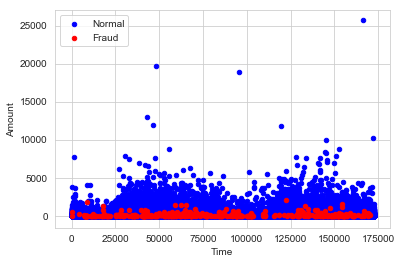

In [12]:
ax1=df[df['Class']==0].plot(kind='scatter',x='Time',y='Amount',color='b',label='Normal')
df[df['Class']==1].plot(kind='scatter',x='Time',y='Amount',color='r',label='Fraud',ax=ax1)

This scatter plot is formed using Amount vs Time. The red points indicate Fraud cases and the blue points indicate Normal cases.
From the plot we can easily find out that :
    1. Data points of both cases are evenly distributed along the X-axis. 
        Therefore, Time does not prove to be a good feature in classifing the class.
    2. Data points of Fraud case can be distinguished on the basis of Y axis easily. 
         Therefore, Amount proves to be a better feature.

In [13]:
frauds = df[df.Class == 1]
normal = df[df.Class == 0]

In [14]:
max=np.max(df['Amount'])
min=np.min(df['Amount'])

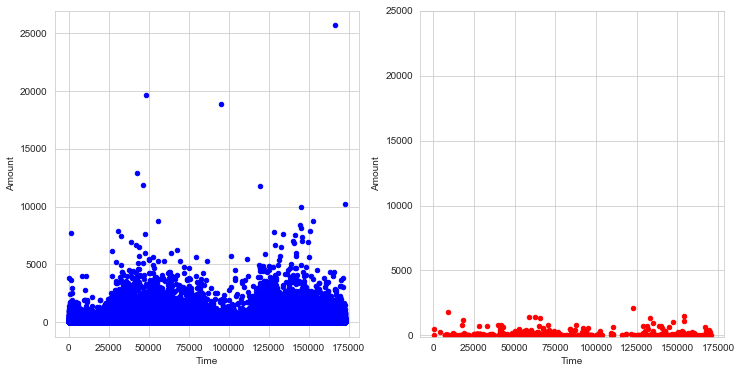

In [15]:
fig=plt.figure(figsize=(12,6))
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)
normal.plot(kind='scatter',x='Time',y='Amount',color='b',ax=ax0)
frauds.plot(kind='scatter',x='Time',y='Amount',color='r',ax=ax1)
ax0.set_yticks(np.arange(min, max, 5000)) 
ax1.set_yticks(np.arange(min, max, 5000))

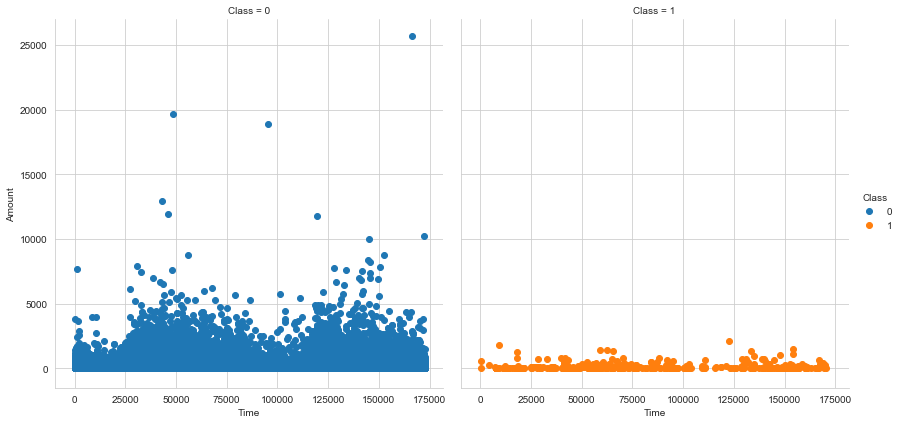

In [16]:
g=sns.FacetGrid(df,hue='Class',col='Class',height=6)
g=g.map(plt.scatter,"Time","Amount")
g.add_legend()

### 2. Distribution Plot

<Figure size 864x432 with 0 Axes>

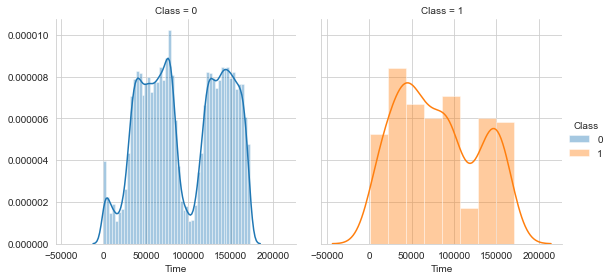

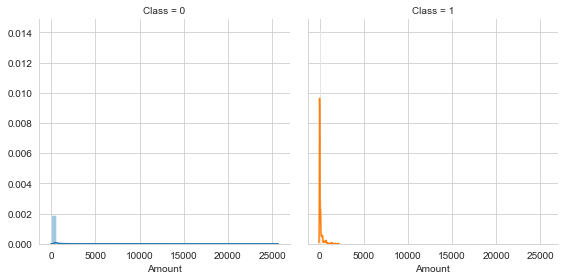

In [17]:
fig=plt.figure(figsize=(12,6))
#ax0=fig.add_subplot(1,2,1)
#ax1=fig.add_subplot(1,2,2)
#normal.plot(kind='scatter',x='Time',y='Amount',color='b',ax=ax0)
#frauds.plot(kind='scatter',x='Time',y='Amount',color='r',ax=ax1)
#ax0.set_yticks(np.arange(min, max, 5000)) 
#ax1.set_yticks(np.arange(min, max, 5000))
ax0=sns.FacetGrid(df,col='Class',hue='Class',height=4)
ax1=sns.FacetGrid(df,col='Class',hue='Class',height=4)
ax0.map(sns.distplot,'Time')
ax1.map(sns.distplot,'Amount')
ax0.add_legend()

### 3. Pairplot

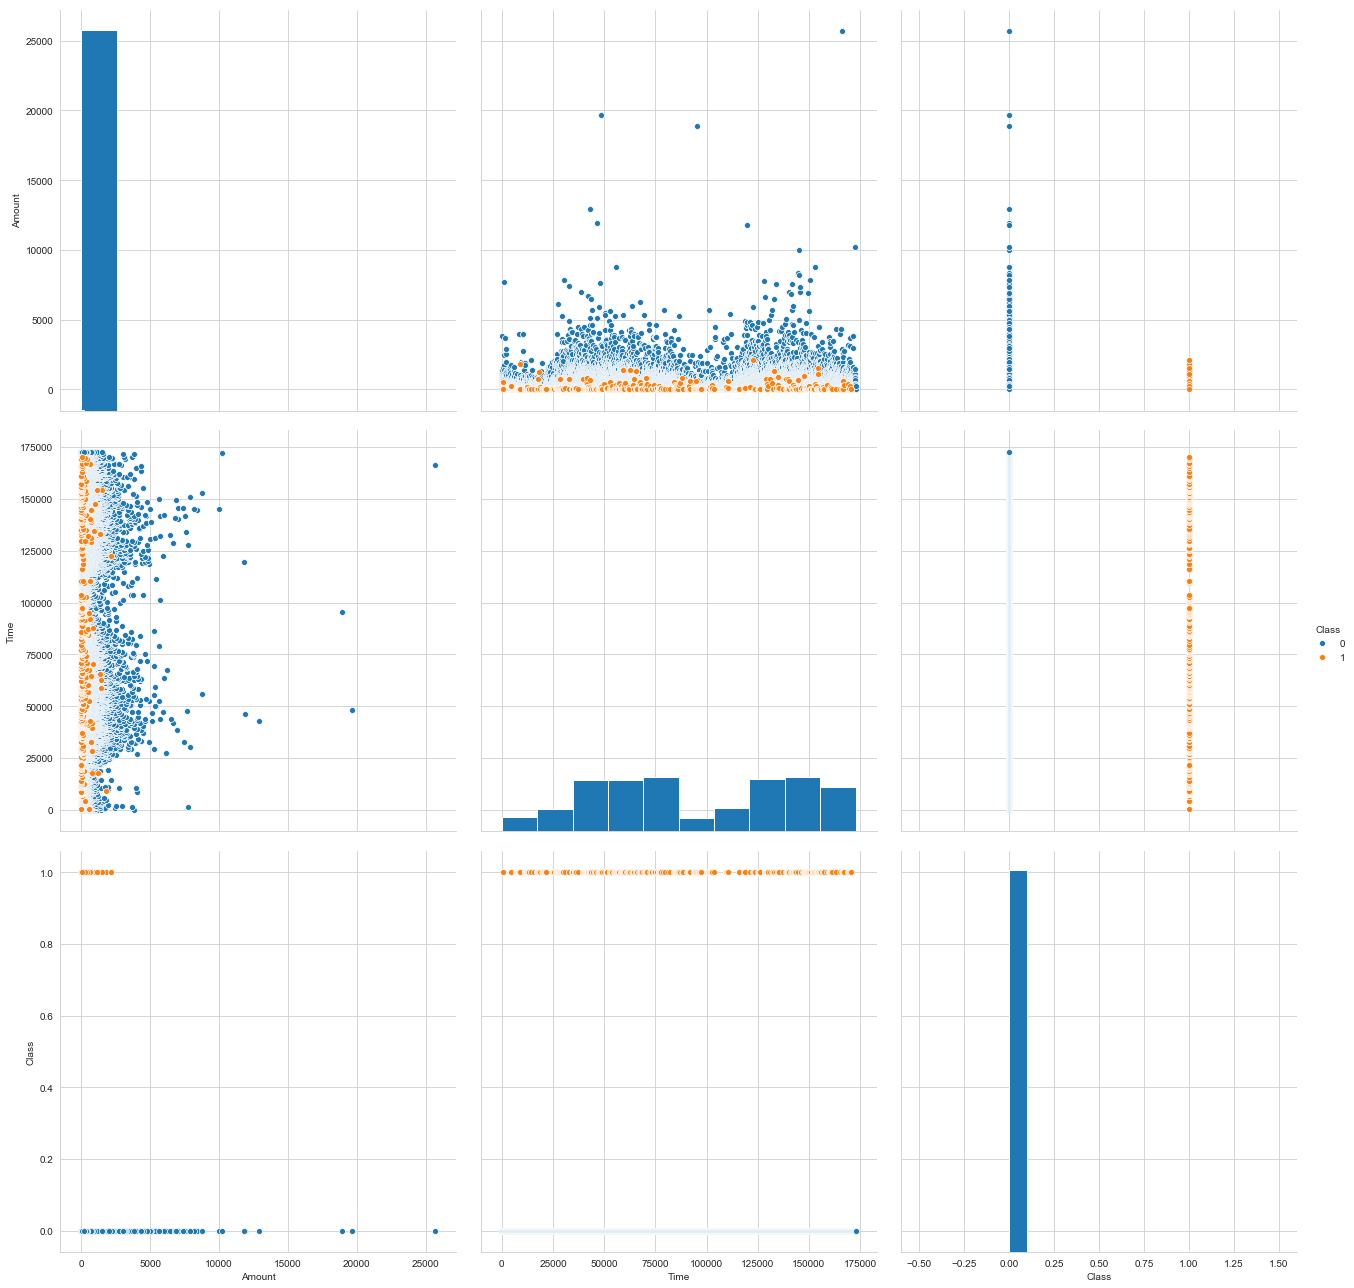

In [18]:
sns.pairplot(df,hue='Class',vars=['Amount','Time','Class'],height=6,diag_kind='hist')

In [19]:
sel_df=df[['Amount','Time','Class']]
sel_fraud=sel_df[sel_df['Class']==1]
sel_normal=sel_df[sel_df['Class']==0]

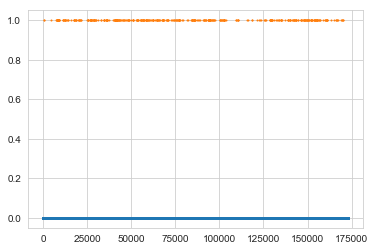

In [20]:
plt.plot(sel_normal["Time"], np.zeros_like(sel_normal["Time"]), "o",markersize=1)
plt.plot(sel_fraud["Time"], np.zeros_like(sel_fraud["Time"])+1, "o",markersize=1)

plt.show()

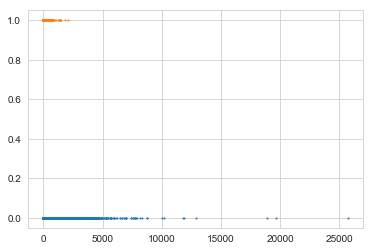

In [21]:
plt.plot(sel_normal["Amount"], np.zeros_like(sel_normal["Amount"]), "o",markersize=1)
plt.plot(sel_fraud["Amount"], np.zeros_like(sel_fraud["Amount"])+1, "o",markersize=1)

plt.show()

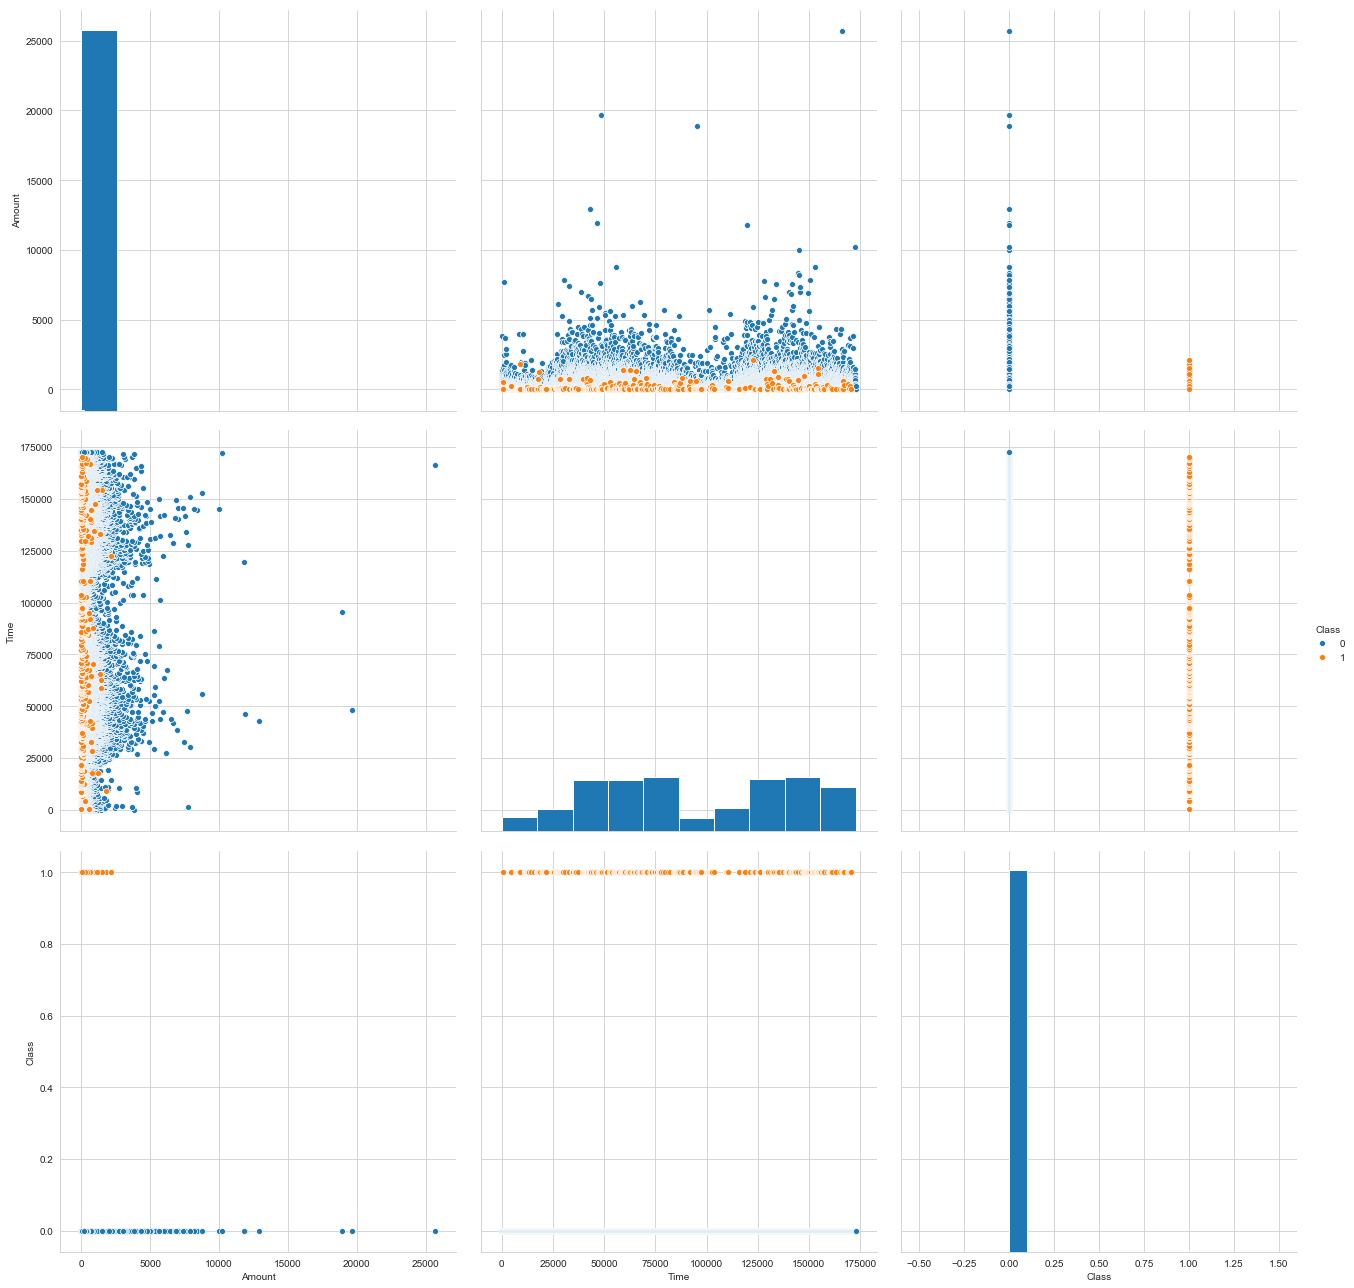

In [22]:
sns.pairplot(df,hue='Class',vars=['Amount','Time','Class'],height=6,diag_kind='hist')

### 4. BoxPlot

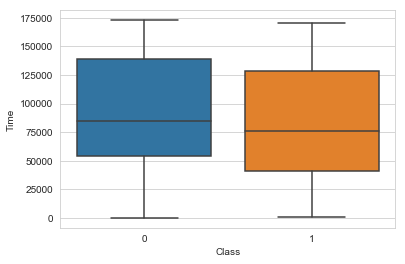

In [23]:
#sel_normal['Amount'].plot(kind='box')
sns.boxplot(x = "Class", y = "Time", data = sel_df)
plt.show()

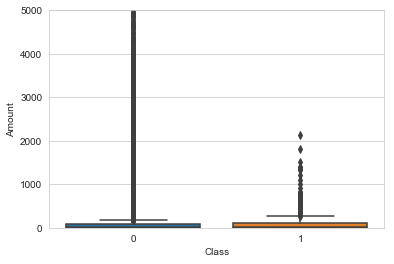

In [24]:
sns.boxplot(x = "Class", y = "Amount", data = sel_df)
plt.ylim(0, 5000)
plt.show()

### 4. Correlation Matrix

In [25]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,normAmount
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323,-0.010596
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347,-0.227709
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289,-0.531409
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961,-0.210880
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447,0.098732
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974,-0.386356
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643,0.215981
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257,0.397311
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875,-0.103079
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733,-0.044246


### 5. Heat Map

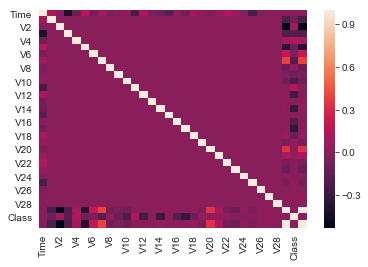

In [26]:
sns.heatmap(df.corr())

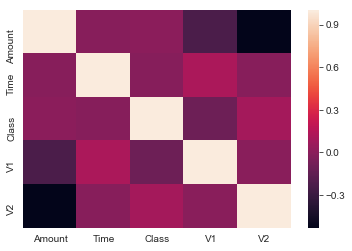

In [27]:
sns.heatmap(df[['Amount','Time','Class','V1','V2']].corr())

### 6. Pie Plot

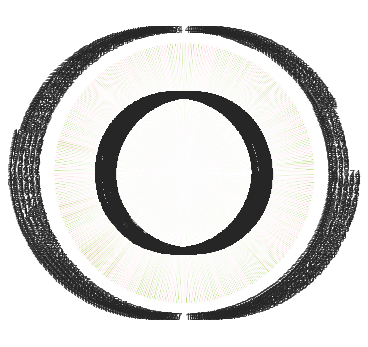

In [28]:
colorlist=['yellowgreen','pink']
df['Class'].plot(kind='pie',figsize=(15,6),autopct='%1.1f%%',colors=colorlist)
#df['Amount'].plot(kind='pie',ax=ax0)

### 7. Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C6A7D005C0>,
      dtype=object)

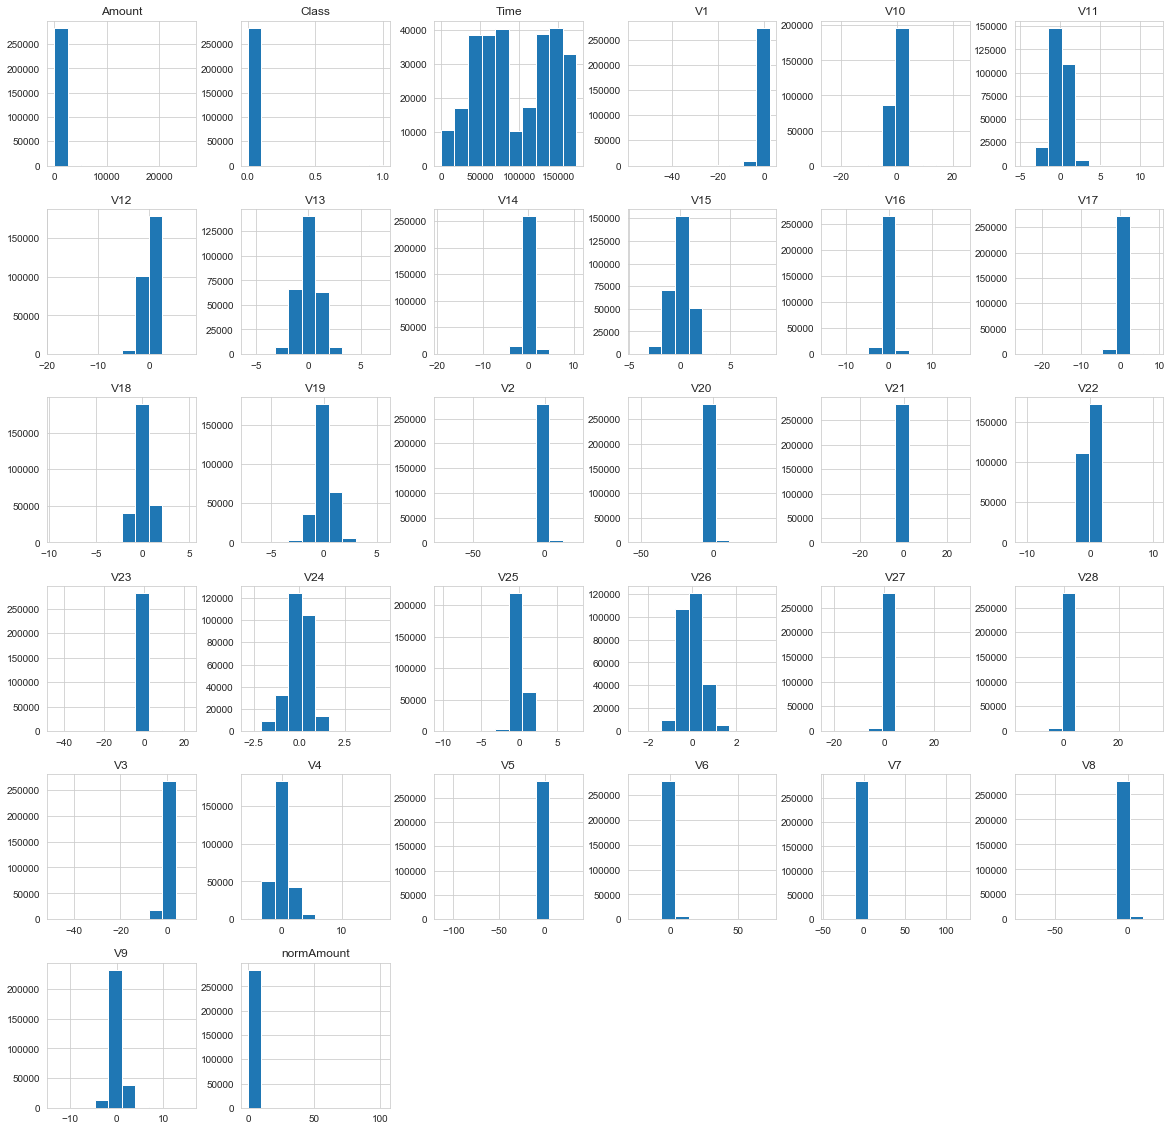

In [30]:
df.hist(figsize=(20,20))

ModuleNotFoundError: No module named 'pycaret'